# Creadit Card Fraud Detection Using Machine Learning Algorithms:

Oversampling and undersampling techniques for dealing with imbalance data

# Machine Learning
1. Logistic Regression classifier
2. Random Forest Classifier

# Deep Learning:

1. Tensorflow, Keras
2. Pytorch

# Impoprting Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import imblearn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.utils import to_categorical
import keras
from keras.callbacks import EarlyStopping
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
import torch, torch.nn as nn, torch.nn.functional as F
from pytorch_model_summary import summary
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler
import torch.utils.data as data_utils
from pytorch_model_summary import summary
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


# DataSet Loading
 Data set can be downloaded from 
 https://www.kaggle.com/isaikumar/creditcardfraud
 
 Features: this dataset includes 31 features:
 1. Time : Number of seconds elapsed between this transaction and the first transaction in the dataset
 2. Amount: Amount of the Transactions
 3. V1 to V28 PCA tranformed (to protect user identities and sensitive features) numerical values 
 3. Class: 
      1: Fraud Transanction, 2: Normal Transaction 
 

In [2]:
df=pd.read_csv("C://Users//bidar20m//Desktop//Dataset//archive//creditcard.csv")

# Exploring Data

In [3]:
df.head(4) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [4]:
df.shape[0]

284807

* Check to see how  blance the data is

In [5]:
print('Number of fraudulent transactions: ', ((df[df['Class']==1]).count())[0])
print('Number of normal transactions: ', ((df[df['Class']==0]).count())[0])
f_transaction=((df[df['Class']==1]).count())[0]
n_transactions=((df[df['Class']==0]).count())[0]
t_transactions=(df.shape[0])
print('Percentage of fraudulent transaction: ', f_transaction/t_transactions*100)

Number of fraudulent transactions:  492
Number of normal transactions:  284315
Percentage of fraudulent transaction:  0.1727485630620034


From above we can see that data is heavily imblanace

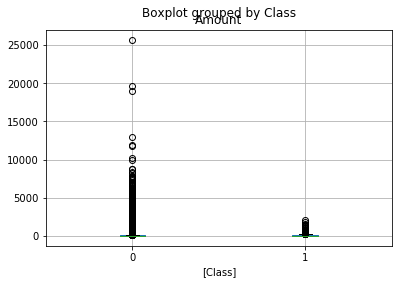

In [6]:
boxplot = df.boxplot(column=['Amount'], by=['Class'])

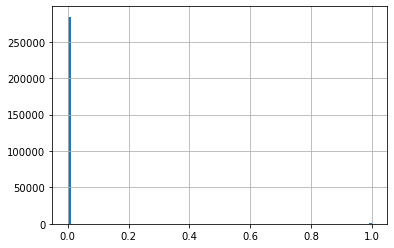

In [7]:
df['Class'].hist(bins=100)

* Plotting barplots to check the distribution of features

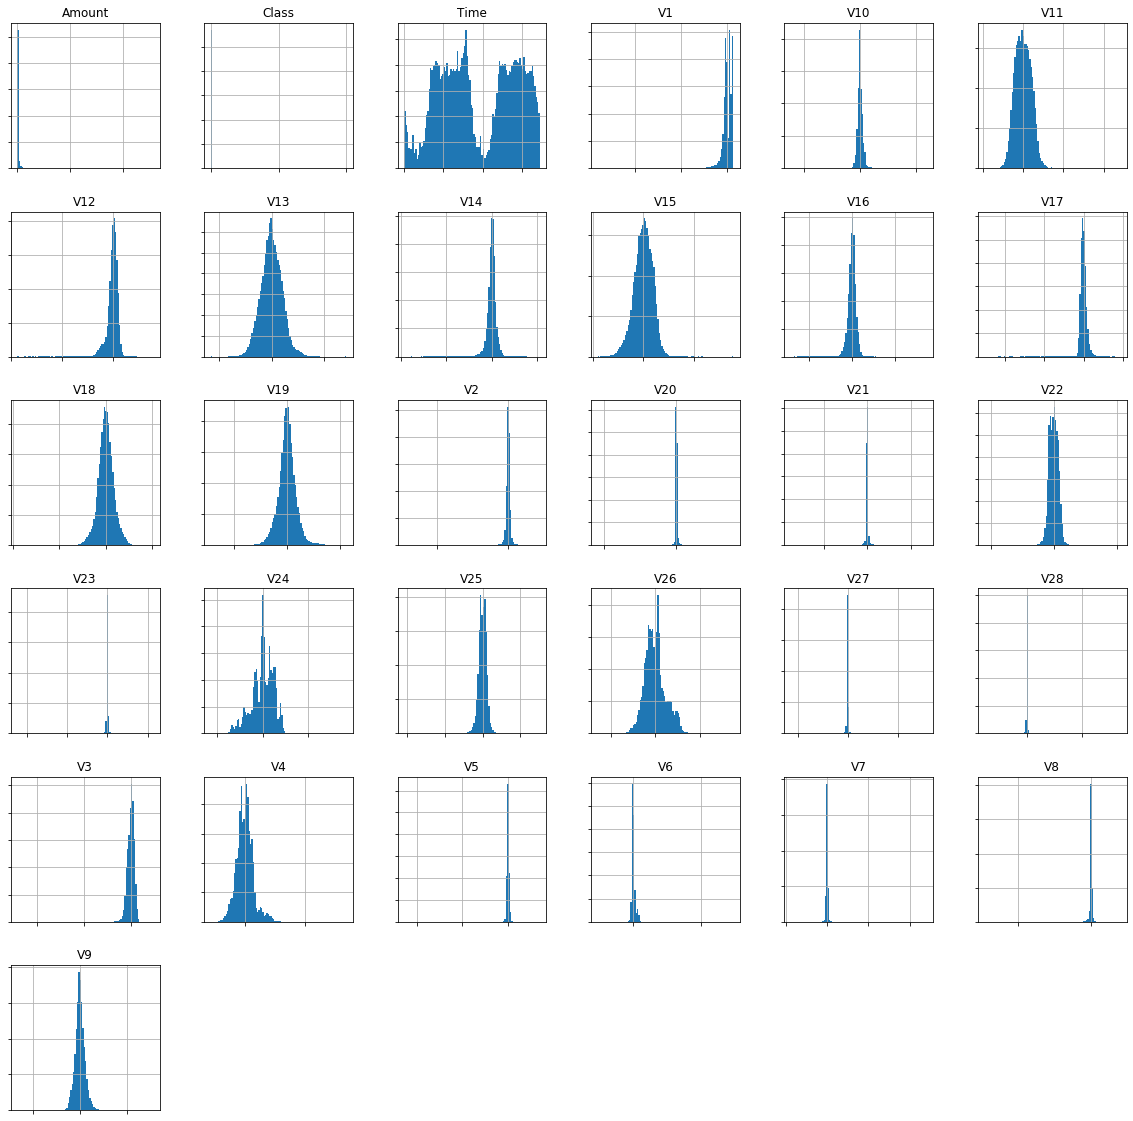

In [8]:
ax = df.hist(bins=100, figsize=(20,20))

for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
plt.show()

* Seprating features from label

In [9]:
X= df.drop(['Class'], axis=1)
y=df['Class']

In [10]:
f_data=((df[df['Class']==1]))
n_data=((df[df['Class']==0]))
f_data=f_data.drop(['Time'], axis=1)
n_data=n_data.drop(['Time'], axis=1)

In [11]:
f_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


* Over Sampling Data to achive balance data

In [12]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

* Data Standardization

In [13]:
Scaler_X = StandardScaler()
X_transformed = Scaler_X.fit_transform(X_over)

* Splitting data to train and test sets

In [14]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_transformed,y_over, test_size = 0.20, random_state = 42)

* Logistic Regression for binary classification

In [15]:
clf = LogisticRegression()
clf.fit(X_train_over,y_train_over)
results= clf.predict(X_test_over)
acuuracy_score = accuracy_score(results, y_test_over)
print(acuuracy_score) 
cm = confusion_matrix(results,y_test_over)
cm

0.9484902309058615


C:\Users\bidar20m\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[55456,  4564],
       [ 1294, 52412]], dtype=int64)

* Random Forest Classifier

In [16]:
clf= RandomForestClassifier(random_state = 5)
clf.fit(X_train_over,y_train_over)
results= clf.predict(X_test_over)
accuracy_score(results,y_test_over)

0.9999472416158135

* Feature Importance

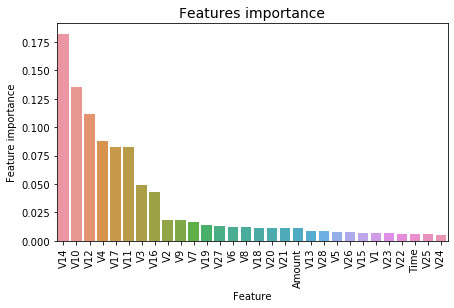

In [17]:
predictors=X.columns
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

# Deep Learning 
1. Keras

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X_transformed,y_over, test_size = 0.20, random_state = 42)
NCOLS=X_train.shape[1]
features= X_train  
CY_train= to_categorical(y_train)
n_cols = features.shape[1]

* Designing the model's layer

In [19]:
model = keras.models.Sequential([
    keras.layers.Dense(200, activation='relu', input_shape = (NCOLS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 
early_stopping_monitor =EarlyStopping(patience=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               6200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [21]:
history=model.fit(features, CY_train, validation_split=0.3, epochs=5, batch_size=5,
                  callbacks = [early_stopping_monitor])


Train on 318432 samples, validate on 136472 samples
Epoch 1/5
318432/318432 [==============================] - 73s 228us/step - loss: 0.0714 - accuracy: 0.9771 - val_loss: 0.0223 - val_accuracy: 0.9938
Epoch 2/5
318432/318432 [==============================] - 74s 231us/step - loss: 0.0403 - accuracy: 0.9901 - val_loss: 0.0233 - val_accuracy: 0.9953
Epoch 3/5
318432/318432 [==============================] - 73s 229us/step - loss: 0.0347 - accuracy: 0.9924 - val_loss: 0.0176 - val_accuracy: 0.9986
Epoch 4/5
318432/318432 [==============================] - 73s 231us/step - loss: 0.0386 - accuracy: 0.9937 - val_loss: 0.0163 - val_accuracy: 0.9985
Epoch 5/5
318432/318432 [==============================] - 73s 230us/step - loss: 0.0362 - accuracy: 0.9942 - val_loss: 0.0164 - val_accuracy: 0.9988


# Data UnderSampling using TomekLinks Method

In [22]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)

In [23]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_res,y_res, test_size = 0.20, random_state = 42)

* Decision Tree on under_sampled data

In [24]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_under, y_train_under)
classifier.score(X_test_under, y_test_under)

0.9991746856781626

In [25]:
NCOLS=X_train_under.shape[1]
CY_train= to_categorical(y_train_under)
n_cols = features.shape[1]

* our deep learning model on under_sampled data

In [26]:
history=model.fit(X_train_under, CY_train, validation_split=0.3, epochs=5, batch_size=5,
                  callbacks = [early_stopping_monitor])

Train on 159451 samples, validate on 68337 samples
Epoch 1/5
159451/159451 [==============================] - 39s 244us/step - loss: 242.4222 - accuracy: 0.9950 - val_loss: 0.0141 - val_accuracy: 0.9981
Epoch 2/5
159451/159451 [==============================] - 43s 268us/step - loss: 0.8796 - accuracy: 0.9982 - val_loss: 0.0141 - val_accuracy: 0.9981
Epoch 3/5
159451/159451 [==============================] - 42s 264us/step - loss: 1.0744 - accuracy: 0.9983 - val_loss: 0.0141 - val_accuracy: 0.9981
Epoch 4/5
159451/159451 [==============================] - 41s 256us/step - loss: 0.6668 - accuracy: 0.9983 - val_loss: 0.0141 - val_accuracy: 0.9981
Epoch 5/5
159451/159451 [==============================] - 41s 256us/step - loss: 2.6040 - accuracy: 0.9983 - val_loss: 0.0149 - val_accuracy: 0.9981


In [27]:
X_train_over.shape

(454904, 30)

# Pytorch
1. Creating Model

In [52]:
class FraudDetection(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(30,26)
        self.fc2=nn.Linear(26,14)
        self.fc3=nn.Linear(14,7)
        self.fc4=nn.Linear(7,1)
        
    def forward(self, x):
        x=x.view(x.size(0), -1)
        x=F.sigmoid(self.fc1(x))
        x=F.dropout(x, p=0.25)
        x=F.sigmoid(self.fc2(x))
        x=F.dropout(x, p=0.25)
        x=F.sigmoid(self.fc3(x))
        x=F.dropout(x, p=0.25)
        x=F.sigmoid(self.fc4(x))
        return x
    
model=FraudDetection()

print(summary(model,torch.zeros((1,30)), show_input=True))

print(summary(model,torch.zeros((1,30)), show_input=False))

print(summary(model,torch.zeros((1,30)), show_input=False, show_hierarchical=True))

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
          Linear-1             [1, 30]             806             806
          Linear-2             [1, 26]             378             378
          Linear-3             [1, 14]             105             105
          Linear-4              [1, 7]               8               8
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
-----------------------------------------------------------------------
-----------------------------------------------------------------------
      Layer (type)        Output Shape         Param #     Tr. Param #
          Linear-1             [1, 26]             806             806
          Linear-2             [1, 14]             378             378
          Linear-3              [1, 7]             105             105
          Linear-4              [1, 1]               8               8
Total 

In [53]:
model=FraudDetection().double()

 Generating Pytorch Train, Test Sets from oversampeled data

In [54]:
X_train, X_test, y_train, y_test= train_test_split(X_transformed,y_over, test_size = 0.20, random_state = 42)
X_train = torch.from_numpy(np.array(X_train))
Y_train = torch.from_numpy(np.array(y_train)).double()
X_test = torch.from_numpy(np.array(X_test))
Y_test = torch.from_numpy(np.array(y_test)).double()

 Binary Cross Entropy Loss function for binary calssification
 
 Defining Optimizer

In [55]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

Generating batches of data

In [56]:
batch_size = 64
train = data_utils.TensorDataset(X_train, Y_train)
train_loader = data_utils.DataLoader(train, batch_size=batch_size, shuffle=True)
test = data_utils.TensorDataset(X_test, Y_test)
test_loader = data_utils.DataLoader(test, batch_size=batch_size, shuffle=True)

In [57]:
def train(train_loader,Epochs):
    for epoch in range(Epochs):
        for c, data in enumerate(train_loader, 0):
            model.train()
            inputs, labels = data
            y_pred = model(inputs)
            loss = loss_fn(y_pred, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()  
            if c % 500==0:
                    print('epoch:{} batch: {} loss: {}'.format(epoch, c, loss.data))    



In [58]:
Epochs=1
train(train_loader,Epochs)

epoch:0 batch: 0 loss: 0.7018180320692097
epoch:0 batch: 500 loss: 0.3187687116506066
epoch:0 batch: 1000 loss: 0.27079554855344296
epoch:0 batch: 1500 loss: 0.1678884725567194
epoch:0 batch: 2000 loss: 0.12391249249497636
epoch:0 batch: 2500 loss: 0.20346246268224294
epoch:0 batch: 3000 loss: 0.1812145256698985
epoch:0 batch: 3500 loss: 0.24794291955992584
epoch:0 batch: 4000 loss: 0.20246326236306633
epoch:0 batch: 4500 loss: 0.1629458140749544
epoch:0 batch: 5000 loss: 0.0903594064489174
epoch:0 batch: 5500 loss: 0.36095997229594257
epoch:0 batch: 6000 loss: 0.18475205685399562
epoch:0 batch: 6500 loss: 0.07258051681048017
epoch:0 batch: 7000 loss: 0.20493882838837602
